## Student Performance

#### Life Cycle of Machine Learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks
- Exploratory Data Analysis
- Data Pre-Processing
- Model Training
- Choose Best Model

### 1. Problem Statement
- This project aims to predict how a student's performance in math (math scores) is influenced by various variables, including student grades, demographics, social factors, and school-related features.

### 2. Data Collection
- Dataset Source - https://www.kaggle.com/datasets/henryshan/student-performance-prediction

#### 2.1 Import Data and Required Packages

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('../data/student-math.csv')
df.head()
df.shape

(395, 34)

#### 2.2 Dataset information

- school : student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
- sex : student's sex (binary: 'F' - female or 'M' - male)
- age : student's age (numeric: from 15 to 22)
- address : student's home address type (binary: 'U' - urban or 'R' - rural)
- famsize : family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
- Pstatus : parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
- Medu : mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
- Fedu : father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
- Mjob : mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- Fjob : father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- reason : reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
- guardian : student's guardian (nominal: 'mother', 'father' or 'other')
- traveltime : home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
- studytime	: weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
- failures : number of past class failures (numeric: n if 1<=n<3, else 4)
- schoolsup	: extra educational support (binary: yes or no)
- famsup : family educational support (binary: yes or no)
- paid : extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
- activities : extra-curricular activities (binary: yes or no)
- nursery : attended nursery school (binary: yes or no)
- higher : wants to take higher education (binary: yes or no)
- internet : Internet access at home (binary: yes or no)
- romantic : with a romantic relationship (binary: yes or no)
- famrel : quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
- freetime : free time after school (numeric: from 1 - very low to 5 - very high)
- goout : going out with friends (numeric: from 1 - very low to 5 - very high)
- Dalc : workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
- Walc : weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
- health : current health status (numeric: from 1 - very bad to 5 - very good)
- absences : number of school absences (numeric: from 0 to 93)
- G1 : first period grade (numeric: from 0 to 20)
- G2 : second period grade (numeric: from 0 to 20)
- G3 : final grade (numeric: from 0 to 20, output target)

### 3. Data Checks To Perform
- Check Missing Values
- Check Duplicates
- Check Data Type
- Check The Number of Unique Values
- Check Statistics of Data Set
- Check Various Categories of Data Set Columns
- Remove Unnamed Columns

#### 3.1 Check Missing Values

In [13]:
df.isna().sum()

Unnamed: 0    0
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

#### 3.2 Check Duplicates

In [14]:
df.duplicated().sum()

0

#### 3.3 Check Data Types

In [15]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  395 non-null    int64 
 1   school      395 non-null    object
 2   sex         395 non-null    object
 3   age         395 non-null    int64 
 4   address     395 non-null    object
 5   famsize     395 non-null    object
 6   Pstatus     395 non-null    object
 7   Medu        395 non-null    int64 
 8   Fedu        395 non-null    int64 
 9   Mjob        395 non-null    object
 10  Fjob        395 non-null    object
 11  reason      395 non-null    object
 12  guardian    395 non-null    object
 13  traveltime  395 non-null    int64 
 14  studytime   395 non-null    int64 
 15  failures    395 non-null    int64 
 16  schoolsup   395 non-null    object
 17  famsup      395 non-null    object
 18  paid        395 non-null    object
 19  activities  395 non-null    object
 20  nursery   

#### 3.4 Check The Number of Unique Values

In [16]:
df.nunique()

Unnamed: 0    395
school          2
sex             2
age             8
address         2
famsize         2
Pstatus         2
Medu            5
Fedu            5
Mjob            5
Fjob            5
reason          4
guardian        3
traveltime      4
studytime       4
failures        4
schoolsup       2
famsup          2
paid            2
activities      2
nursery         2
higher          2
internet        2
romantic        2
famrel          5
freetime        5
goout           5
Dalc            5
Walc            5
health          5
absences       34
G1             17
G2             17
G3             18
dtype: int64

#### 3.5 Check Statistics of Data Set

In [17]:
df.describe()

,Unnamed: 0,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,197.000000,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,114.170924,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,0.000000,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,98.500000,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,197.000000,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,295.500000,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,394.000000,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


#### 3.6 Exploring Data

In [18]:
df.head()

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,GP,F,18,U,GT3,A,4,4,at_home,...,4,3,4,1,1,3,6,5,6,6
1,1,GP,F,17,U,GT3,T,1,1,at_home,...,5,3,3,1,1,3,4,5,5,6
2,2,GP,F,15,U,LE3,T,1,1,at_home,...,4,3,2,2,3,3,10,7,8,10
3,3,GP,F,15,U,GT3,T,4,2,health,...,3,2,2,1,1,5,2,15,14,15
4,4,GP,F,16,U,GT3,T,3,3,other,...,4,3,2,1,2,5,4,6,10,10


In [19]:
print("Categories in 'school' variable: ",end=" ")
print(df['school'].unique())

print("Categories in 'sex' variable: ",end=" ")
print(df['sex'].unique())

print("Categories in 'age': ",end=" ")
print(df['age'].unique())

print("Categories in 'address' variable: ",end=" ")
print(df['address'].unique())

print("Categories in 'famsize' variable: ",end=" ")
print(df['famsize'].unique())

print("Categories in 'Pstatus' variable: ",end=" ")
print(df['Pstatus'].unique())

print("Categories in 'Medu' variable: ",end=" ")
print(df['Medu'].unique())

print("Categories in 'Fedu' variable: ",end=" ")
print(df['Fedu'].unique())

print("Categories in 'Mjob' variable: ",end=" ")
print(df['Mjob'].unique())

print("Categories in 'Fjob' variable: ",end=" ")
print(df['Fjob'].unique())

print("Categories in 'reason' variable: ",end=" ")
print(df['reason'].unique())

print("Categories in 'guardian' variable: ",end=" ")
print(df['guardian'].unique())

print("Categories in 'traveltime' variable: ",end=" ")
print(df['traveltime'].unique())

print("Categories in 'studytime' variable: ",end=" ")
print(df['studytime'].unique())

print("Categories in 'failures' variable: ",end=" ")
print(df['failures'].unique())

print("Categories in 'schoolsup' variable: ",end=" ")
print(df['schoolsup'].unique())

print("Categories in 'famsup' variable: ",end=" ")
print(df['famsup'].unique())

print("Categories in 'paid' variable: ",end=" ")
print(df['paid'].unique())

print("Categories in 'activities' variable: ",end=" ")
print(df['activities'].unique())

print("Categories in 'nursery' variable: ",end=" ")
print(df['nursery'].unique())

print("Categories in 'higher' variable: ",end=" ")
print(df['higher'].unique())

print("Categories in 'internet' variable: ",end=" ")
print(df['internet'].unique())

print("Categories in 'romantic' variable: ",end=" ")
print(df['romantic'].unique())

print("Categories in 'famrel' variable: ",end=" ")
print(df['famrel'].unique())

print("Categories in 'freetime' variable: ",end=" ")
print(df['freetime'].unique())

print("Categories in 'goout' variable: ",end=" ")
print(df['goout'].unique())

print("Categories in 'Dalc' variable: ",end=" ")
print(df['Dalc'].unique())

print("Categories in 'Walc' variable: ",end=" ")
print(df['Walc'].unique())

print("Categories in 'health' variable: ",end=" ")
print(df['health'].unique())

print("Categories in 'absences' variable: ",end=" ")
print(df['absences'].unique())

print("Categories in 'G1' variable: ",end=" ")
print(df['G1'].unique())

print("Categories in 'G2' variable: ",end=" ")
print(df['G2'].unique())

print("Categories in 'G3' variable: ",end=" ")
print(df['G3'].unique())

Categories in 'school' variable:  ['GP' 'MS']
Categories in 'sex' variable:  ['F' 'M']
Categories in 'age':  [18 17 15 16 19 22 20 21]
Categories in 'address' variable:  ['U' 'R']
Categories in 'famsize' variable:  ['GT3' 'LE3']
Categories in 'Pstatus' variable:  ['A' 'T']
Categories in 'Medu' variable:  [4 1 3 2 0]
Categories in 'Fedu' variable:  [4 1 2 3 0]
Categories in 'Mjob' variable:  ['at_home' 'health' 'other' 'services' 'teacher']
Categories in 'Fjob' variable:  ['teacher' 'other' 'services' 'health' 'at_home']
Categories in 'reason' variable:  ['course' 'other' 'home' 'reputation']
Categories in 'guardian' variable:  ['mother' 'father' 'other']
Categories in 'traveltime' variable:  [2 1 3 4]
Categories in 'studytime' variable:  [2 3 1 4]
Categories in 'failures' variable:  [0 3 2 1]
Categories in 'schoolsup' variable:  ['yes' 'no']
Categories in 'famsup' variable:  ['no' 'yes']
Categories in 'paid' variable:  ['no' 'yes']
Categories in 'activities' variable:  ['no' 'yes']
Cat

In [20]:
# Define Numerical & Categorical Columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# Print Columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('We have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 17 numerical features : ['Unnamed: 0', 'age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']
We have 17 categorical features : ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


#### 3.7 Remove Unnamed Columns

In [21]:
df = df.drop(columns=['Unnamed: 0'])
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


### 4. Exploring Data (Visualization)

#### 4.1 Visualize Attribute Distribution

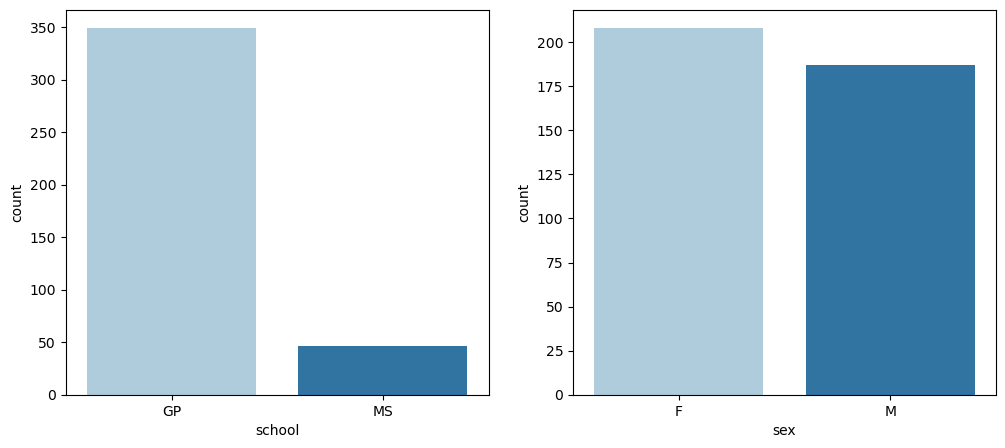

In [22]:
fig, axs = plt.subplots(figsize=(12, 5))
custom_palette = sns.color_palette('Paired')
plt.subplot(121)
sns.countplot(data=df, x='school', palette=custom_palette)
plt.subplot(122)
sns.countplot(data=df, x='sex', palette=custom_palette)
plt.show()

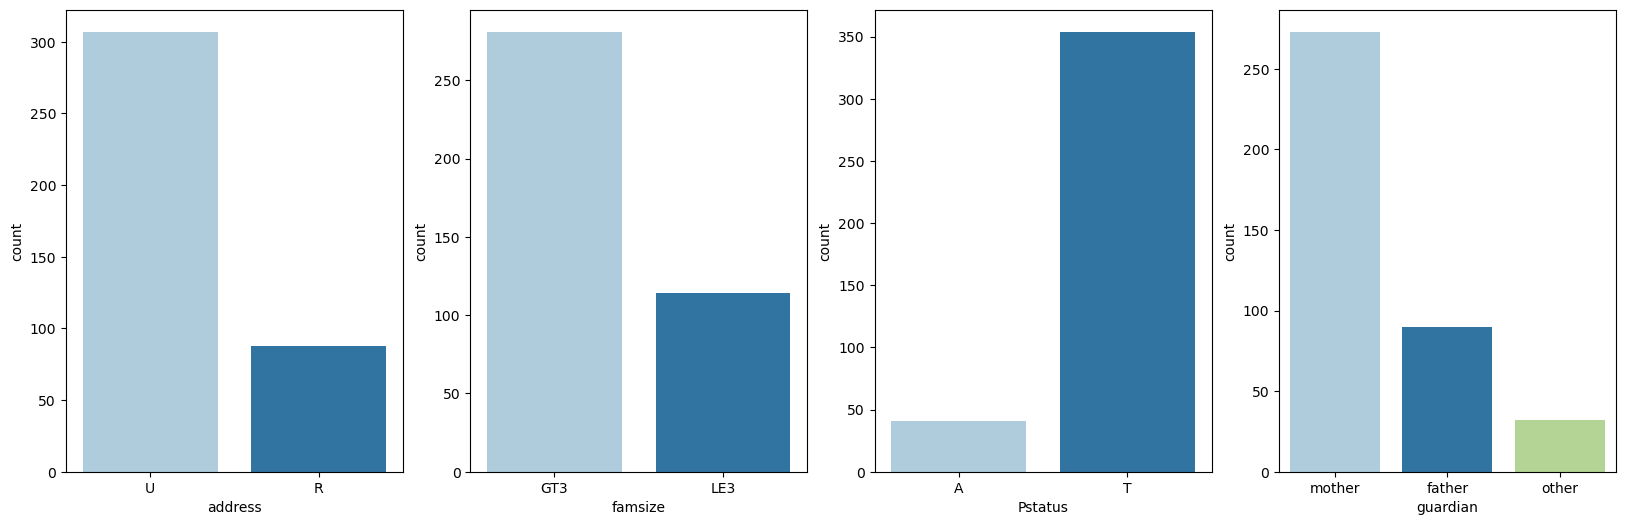

In [23]:
fig, axs = plt.subplots(1, 4, figsize=(20,6))
custom_palette = sns.color_palette('Paired')
sns.countplot(data=df, x='address', palette=custom_palette, ax=axs[0])
sns.countplot(data=df, x='famsize', palette=custom_palette, ax=axs[1])
sns.countplot(data=df, x='Pstatus', palette=custom_palette, ax=axs[2])
sns.countplot(data=df, x='guardian', palette=custom_palette, ax=axs[3])
plt.show()

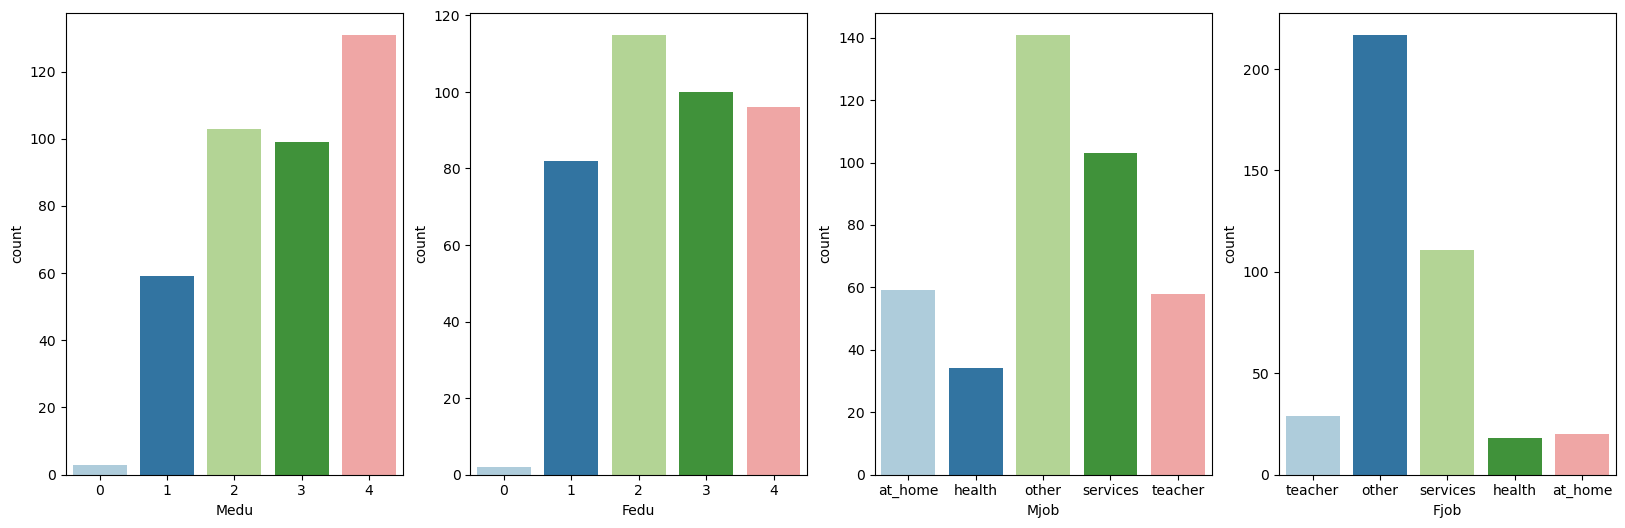

In [24]:
fig, axs = plt.subplots(1, 4, figsize=(20,6))
custom_palette = sns.color_palette('Paired')
sns.countplot(data=df, x='Medu', palette=custom_palette, ax=axs[0])
sns.countplot(data=df, x='Fedu', palette=custom_palette, ax=axs[1])
sns.countplot(data=df, x='Mjob', palette=custom_palette, ax=axs[2])
sns.countplot(data=df, x='Fjob', palette=custom_palette, ax=axs[3])
plt.show()

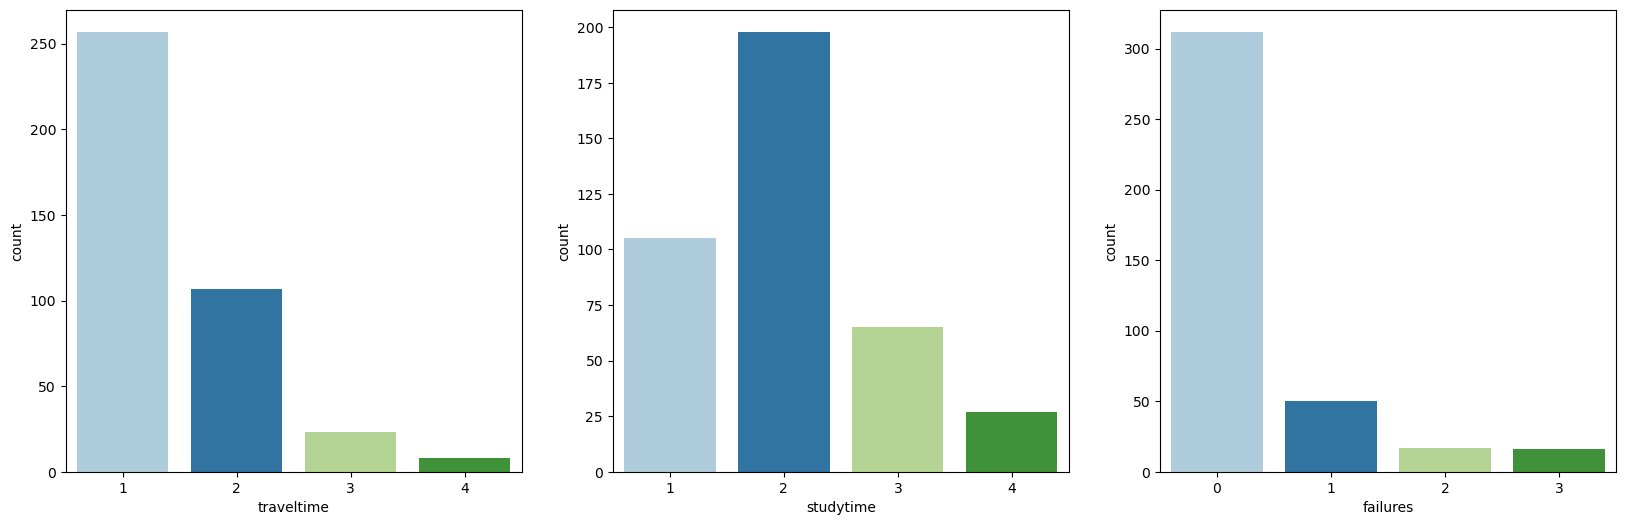

In [25]:
fig, axs = plt.subplots(1, 3, figsize=(20,6))
custom_palette = sns.color_palette('Paired')
sns.countplot(data=df, x='traveltime', palette=custom_palette, ax=axs[0])
sns.countplot(data=df, x='studytime', palette=custom_palette, ax=axs[1])
sns.countplot(data=df, x='failures', palette=custom_palette, ax=axs[2])
plt.show()

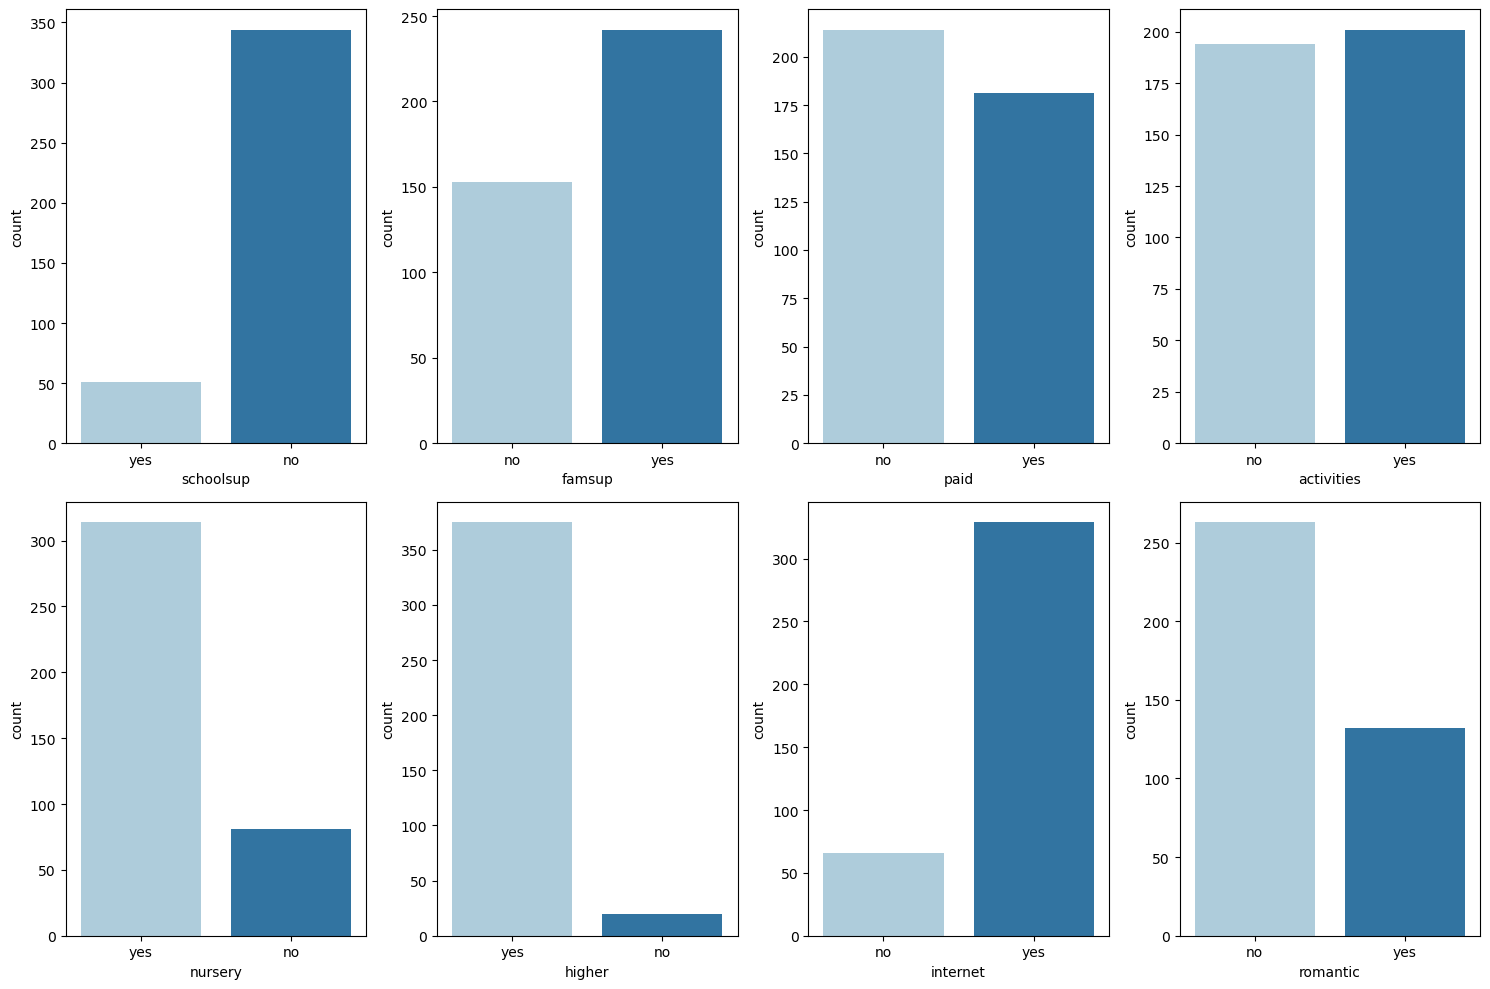

In [26]:
fig, axs = plt.subplots(2, 4, figsize=(15, 10))
custom_palette = sns.color_palette('Paired')
sns.countplot(data=df, x='schoolsup', palette=custom_palette, ax=axs[0, 0])
sns.countplot(data=df, x='famsup', palette=custom_palette, ax=axs[0, 1])
sns.countplot(data=df, x='paid', palette=custom_palette, ax=axs[0, 2])
sns.countplot(data=df, x='activities', palette=custom_palette, ax=axs[0, 3])
sns.countplot(data=df, x='nursery', palette=custom_palette, ax=axs[1, 0])
sns.countplot(data=df, x='higher', palette=custom_palette, ax=axs[1, 1])
sns.countplot(data=df, x='internet', palette=custom_palette, ax=axs[1, 2])
sns.countplot(data=df, x='romantic', palette=custom_palette, ax=axs[1, 3])
plt.tight_layout()
plt.show()

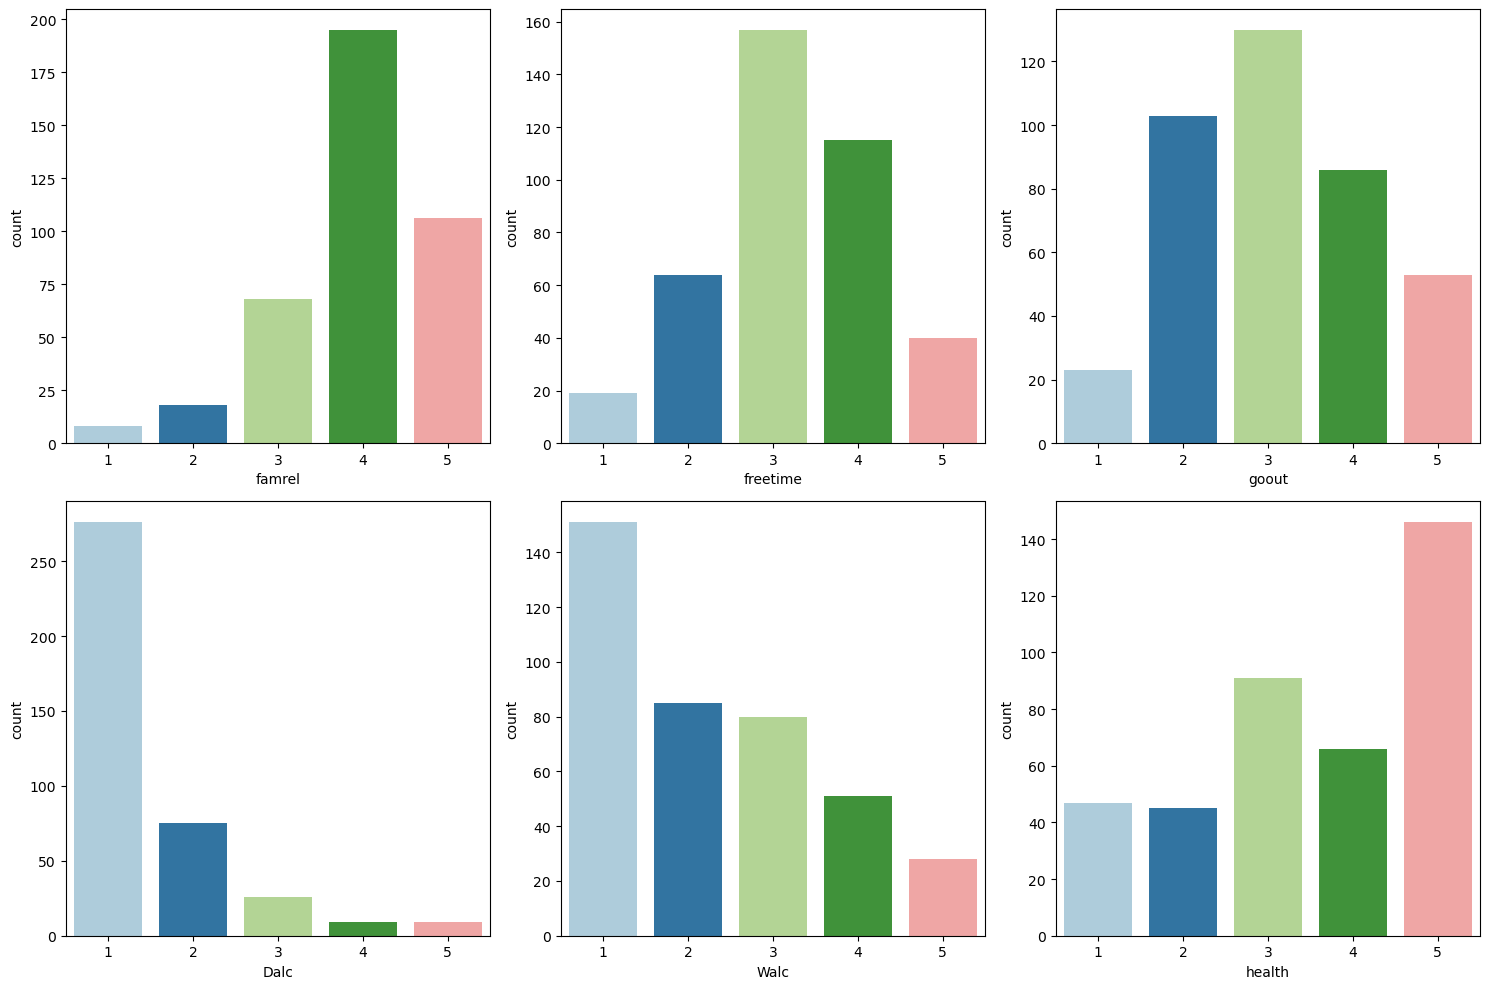

In [27]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
custom_palette = sns.color_palette('Paired')
sns.countplot(data=df, x='famrel', palette=custom_palette, ax=axs[0, 0])
sns.countplot(data=df, x='freetime', palette=custom_palette, ax=axs[0, 1])
sns.countplot(data=df, x='goout', palette=custom_palette, ax=axs[0, 2])
sns.countplot(data=df, x='Dalc', palette=custom_palette, ax=axs[1, 0])
sns.countplot(data=df, x='Walc', palette=custom_palette, ax=axs[1, 1])
sns.countplot(data=df, x='health', palette=custom_palette, ax=axs[1, 2])
plt.tight_layout()
plt.show()